In [1]:
import numpy as np
import pandas as pd
import os
import requests
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Machine Learning Libraries
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from scipy import zeros as sci_zeros
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter

simplefilter("ignore", ClusterWarning)

In [3]:
df = pd.read_excel('Stepstone_job_vacancies.xlsx') 
df.head()

,Job_Title,Company_Name,Location,Job_Description
0,Digital Data Scientist,ADAC,München,Degree - You have successfully completed a deg...
1,Data Scientist (w/m/d) Machine Learning,ALD AutoLeasing D GmbH,Hamburg,You have a university degree or a doctorate in...
2,"Applied Scientist II, AFT AI",Amazon Europe Core,Berlin,"PhD, or a Master's degree and experience i..."
3,Data Analyst im Bereich Integration & Absicherung,ARRK Engineering GmbH,München,Successfully completed studies in electrical e...
4,Data Analyst,Arthrex GmbH,München,You have successfully completed a degree in da...


## Extract skills from job postings

In [4]:
# Programming/system skills
sskills = {}
sskills['SQL'] = []
sskills['Python'] = []
sskills['Hadoop'] = []
sskills['Spark'] = []
sskills['Git'] = []

# Technical, data-related, modeling/algorithmic skills
tskills = {}
tskills['Data Analysis'] = []
tskills['Artificial Intelligence'] = []
tskills['Data Visualization'] = []
tskills['Machine Learning'] = []

# Business skills
bskills = {}
bskills['Problem Solving'] = []
bskills['Negotiation Skills'] = []
bskills['Business Intelligence'] = []

# Teamwork and communication skills
pskills = {}
pskills['Teamwork'] = []
pskills['Agile'] = []
pskills['Communication'] = []

In [5]:
# Extract skills from job descriptions
for ir, dfr in df.iterrows():
    cleantext = dfr['Job_Description']
    
    if ('sql' in cleantext.lower()) or ('Structured Query Language' in cleantext.lower()):
        sskills['SQL'].append('1')
    else:
        sskills['SQL'].append('0')
        
    if ('python' in cleantext.lower()):
        sskills['Python'].append('1')
    else:
        sskills['Python'].append('0')
        
    if ('hadoop' in cleantext.lower()):
        sskills['Hadoop'].append('1')
    else:
        sskills['Hadoop'].append('0')
        
    if ('spark' in cleantext.lower()):
        sskills['Spark'].append('1')
    else:
        sskills['Spark'].append('0')
        
    if ('git' in cleantext.lower()) or ('github' in cleantext.lower()) or ('gitlab' in cleantext.lower()):
        sskills['Git'].append('1')
    else:
        sskills['Git'].append('0')
        
    if ('data anal' in cleantext.lower()) or ('data scien' in cleantext.lower()):
        tskills['Data Analysis'].append('1')
    else:
        tskills['Data Analysis'].append('0')
        
    if ('artificial intelligence' in cleantext.lower()) or ('ai' in cleantext.lower()) or ('neural network' in cleantext.lower()):
        tskills['Artificial Intelligence'].append('1')
    else:
        tskills['Artificial Intelligence'].append('0')
        
    if ('data visualization' in cleantext.lower()) or ('visualization' in cleantext.lower()):
        tskills['Data Visualization'].append('1')
    else:
        tskills['Data Visualization'].append('0')
        
    if ('machine learning' in cleantext.lower()) or ('ml' in cleantext.lower()) or ('dl' in cleantext.lower()):
        tskills['Machine Learning'].append('1')
    else:
        tskills['Machine Learning'].append('0')
        
    if ('problem solving' in cleantext.lower()):
        bskills['Problem Solving'].append('1')
    else:
        bskills['Problem Solving'].append('0')
        
    if ('negotiation' in cleantext.lower()) or ('english' in cleantext.lower()):
        bskills['Negotiation Skills'].append('1')
    else:
        bskills['Negotiation Skills'].append('0')
        
    if ('business intelligence' in cleantext.lower()) or ('bi' in cleantext.lower()):
        bskills['Business Intelligence'].append('1')
    else:
        bskills['Business Intelligence'].append('0')
        
    if ('team' in cleantext.lower()):
        pskills['Teamwork'].append('1')
    else:
        pskills['Teamwork'].append('0')
                
    if ('agile' in cleantext.lower()) or ('scrum' in cleantext.lower()) or ('kanban' in cleantext.lower()):
        pskills['Agile'].append('1')
    else:
        pskills['Agile'].append('0')
                
    if ('communication' in cleantext.lower()):
        pskills['Communication'].append('1')
    else:
        pskills['Communication'].append('0')  

In [6]:
df1 = df[['Company_Name', 'Location', 'Job_Description', 'Job_Title']].copy()

df2 = pd.DataFrame(sskills)
df3 = pd.DataFrame(tskills)
df4 = pd.DataFrame(bskills)
df5 = pd.DataFrame(pskills)

frames = [df1, df2, df3, df4, df5]
res = pd.concat(frames, axis=1)
res.head()

,Company_Name,Location,Job_Description,Job_Title,SQL,Python,Hadoop,Spark,Git,Data Analysis,Artificial Intelligence,Data Visualization,Machine Learning,Problem Solving,Negotiation Skills,Business Intelligence,Teamwork,Agile,Communication
0,ADAC,München,Degree - You have successfully completed a deg...,Digital Data Scientist,1,0,0,0,0,1,0,0,0,0,1,1,1,0,1
1,ALD AutoLeasing D GmbH,Hamburg,You have a university degree or a doctorate in...,Data Scientist (w/m/d) Machine Learning,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0
2,Amazon Europe Core,Berlin,"PhD, or a Master's degree and experience i...","Applied Scientist II, AFT AI",0,1,0,0,0,1,1,0,1,0,0,0,0,0,0
3,ARRK Engineering GmbH,München,Successfully completed studies in electrical e...,Data Analyst im Bereich Integration & Absicherung,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
4,Arthrex GmbH,München,You have successfully completed a degree in da...,Data Analyst,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0


In [7]:
# Save skills as 2D array
df_fin = res.iloc[:, 5:] 
df_summary = df_fin.apply(pd.to_numeric)
a = df_summary.values

print("Number of job postings: ", a.shape[0])
print(a)

Number of job postings:  72
[[0 0 0 ... 1 0 1]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 1 1 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


## Hierarchical clustering of skills

In [8]:
# Create empty matrix to fill
D = np.zeros([a.shape[1], a.shape[1]])

# Find all element-wise skills proximities (distances)
for k in range(a.shape[0]):
    for i in range(a.shape[1]):
        for j in range(a.shape[1]):
            D[i,j] = D[i,j] + abs(a[k,i]-a[k,j])

In [9]:
# Creating Dendrogram for data (Y is a linkage matrix)
Y = sch.linkage(D, method='complete')

#Y = sch.linkage(D, method='average')
#Y = sch.linkage(D, method='centroid')


[Text(0, 5, 'Data Analysis'),
 Text(0, 15, 'Python'),
 Text(0, 25, 'Negotiation Skills'),
 Text(0, 35, 'Business Intelligence'),
 Text(0, 45, 'Agile'),
 Text(0, 55, 'Data Visualization'),
 Text(0, 65, 'Git'),
 Text(0, 75, 'Spark'),
 Text(0, 85, 'Hadoop'),
 Text(0, 95, 'Problem Solving'),
 Text(0, 105, 'Artificial Intelligence'),
 Text(0, 115, 'Machine Learning'),
 Text(0, 125, 'Teamwork'),
 Text(0, 135, 'Communication')]

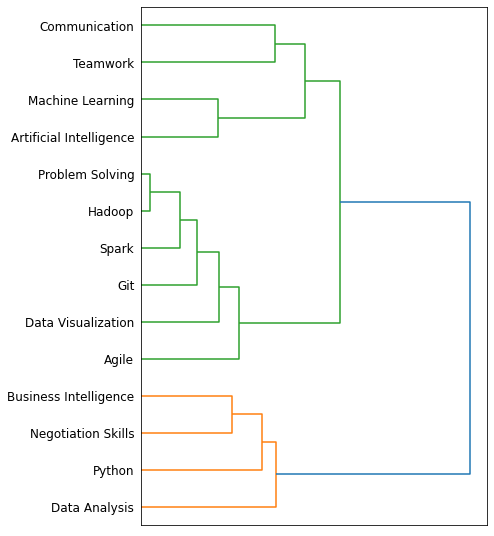

In [10]:
# Plot dendrogram
fig = plt.figure(figsize=(12,12))
ax = fig.add_axes([0.1, 0.1, 0.4, 0.6])

Z = sch.dendrogram(Y, orientation='right')
labels = df_summary.columns[Z['leaves']]
ax.set_xticks([])
ax.set_yticklabels(labels)

## Print clusters for selected distance level

In [11]:
# Cutting the dendrogram at max_d
max_d = 0.6

[]

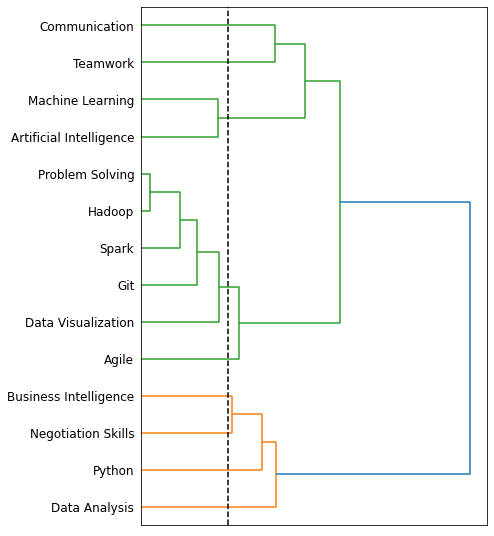

In [12]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_axes([0.1, 0.1, 0.4, 0.6])

Z = sch.dendrogram(Y, orientation='right')
labels = df_summary.columns[Z['leaves']]
ax.set_xticks([])
ax.set_yticklabels(labels)

# Cutting the dendrogram at max_d
plt.axvline(max_d*D.max(), c='k', linestyle='--')
plt.plot()

In [13]:
# Identify cluster with max_d cut
lbs = sch.fcluster(Y, max_d*D.max(), 'distance')
clustr = lbs[Z['leaves']]

clust_skls = {}
for k in list(set(clustr)):
    clust_skls[k] = []
    
for j in range(len(labels)):
    clust_skls[clustr[j]].append(labels[j])

In [14]:
for key, value in clust_skls.items():
    print(key, value)
    
print("Number of authomatically created clusters: ", len(clust_skls))

1 ['Negotiation Skills']
2 ['Business Intelligence']
3 ['Python']
4 ['Data Analysis']
5 ['Data Visualization', 'Git', 'Spark', 'Hadoop', 'Problem Solving']
6 ['Agile']
7 ['Artificial Intelligence', 'Machine Learning']
8 ['Teamwork']
9 ['Communication']
Number of authomatically created clusters:  9
